<a href="https://colab.research.google.com/github/coding-dojo-data-science/machine-learning-practice-solutions/blob/main/SOLUTION_Feature_Inspection_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5 - Feature Inspection Exercise - Solution

<table style="background-color: rgb(13,32,76); border-radius: 10px">
	<thead>
		<tr>
			<th colspan="2" style="border: hidden; vertical-align: top;" width="15%"><img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1674755226__Icons_400px_Practice Assignment.png">
			</th>
			<th style="border: hidden;">
				<h1 style="color: white;">Feature Inspection (Practice)</h1>
			</th>
		</tr>
	</thead>
</table>
<p>This practice assignment will reinforce important learning objectives from the previous lesson(s), and allow you to take on more challenging core assignments, preparing you for graduation.<br></p>
<p>Practice and tinker with this assignment until you're comfortable performing each of the tasks. Then, be sure to submit your output as described in the steps below.</p>
<hr>
<h2>Feature Inspection (Practice):</h2>
<h4>Instructions</h4>
<p>For this task, you will use a <a href="https://drive.google.com/file/d/1-17RJeMvb7Ruak-NBLnLleQYL_4tOQn_/view?usp=share_link" target="_blank">modified version of the cereals dataset.</a> You can find the <a href="https://www.kaggle.com/datasets/crawford/80-cereals" target="_blank">data dictionary on Kaggle.</a><br></p>
<p>This dataset shows popular cereals by brand and manufacturer, along with nutrition facts. The machine learning question is:</p>
<p><strong><em>How well can the "rating" of a cereal be predicted using the following features?</em></strong></p>
<ul><li>mfr, type, calories, protein, fat, fiber, sugars, shelf</li></ul>
<p>At this point, you are just completing the <u>feature inspection /exploratory data analysis.</u> </p>
<h4>We have provided an optional Starter Notebook for you <a href="https://github.com/coding-dojo-data-science/machine-learning-practice-solutions/blob/main/STARTER_Feature_Inspection.ipynb" target="_blank">here.</a></h4>
<p>In a later assignment, you will preprocess the data for modeling, using the EDA from this assignment to inform your choices.<br></p>
<p>You will need to:</p>
<p><strong>Load the data</strong></p>
<ul><li>Keep only the required columns listed above (drop the rest).</li></ul>
<p><strong>Answer the following questions in a Markdown cell in your Colab Notebook:</strong></p>
<ul><li><strong>Define your target column.</strong></li><li>Is this a classification or regression task? </li>
    </ul>
<p><u><strong>For each feature:</strong></u></p>
<ul><li><strong>Add a new markdown header.</strong></li><li><strong>Paste the feature's definition from the data dictionary into a markdown cell.</strong></li><li><strong>Create a univariate visualization showing the distribution of values/categories.</strong><ul><li><font color="#505050" face="Gotham-Rounded-Medium">Create an appropriate univariate visualization based on the data type<br></font></li><li>You may use the EDA functions from the previous lessons or create your own visualizations.</li></ul></li><li><strong>Answer the following questions from the Feature Inspection lesson in a markdown cell:</strong><ul><li>What type of feature is it? (Categorical (nominal), ordinal, numeric)</li></ul><ul><li>How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)</li><li>Is the feature constant or quasi-constant?</li><li>What is the cardinality? Is it high (&gt;10)?</li><li>Would we know this feature <strong>before</strong> the target is determined?</li><li>Is there a business case/understanding reason to exclude based on our business case?</li></ul></li><li><strong>Create a multivariate visualization plotting each feature vs. the target. <br></strong></li><li><strong>Answer the following questions from the Feature Inspection lesson in a Markdown cell:<br></strong><ul><li>Based on your business understanding, would you expect this feature to be a predictor of the target?</li><li>Does this feature appear to be a predictor of the target?</li></ul></li></ul>
<p>Then save your notebook and use File &gt; Download &gt; Download Notebook (.ipynb) and upload your notebook as your submission for this assignment.</p>
<h1><a href="https://colab.research.google.com/drive/1CdBHwL2DUCEMaqzTFO7s0piXRBMhGjpU?usp=sharing" target="_blank">Exercise Solution</a></h1>

## EDA Functions

In [1]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna 
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing 
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot 
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')
  
  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()
      
  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  
  ## Save null value counts and percent for printing 
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()
  
  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100
  
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes
  

In [2]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna 
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x]) 
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  
    # Barplot 
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)
  
  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax, 
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  
  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4), 
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added 
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

# Load the Data

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### LOAD DATASET FROM GOOGLE DRIVE OR URL
# load data 
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSlxm22ftBEbkw8AS5NSzggxMWRLD_gxJ8o6RTZqdrTcQXcEt3EpsShuEBbSWDSmWgB_xLgSDn2fxDH/pub?output=csv"
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       75 non-null     object 
 2   type      77 non-null     object 
 3   calories  72 non-null     float64
 4   protein   77 non-null     int64  
 5   fat       70 non-null     float64
 6   sodium    77 non-null     int64  
 7   fiber     71 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    71 non-null     float64
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     75 non-null     object 
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(8), int64(4), object(4)
memory usage: 9.8+ KB


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,NaN,4,1.0,130,10.0,5.0,6.0,280,25,top,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120.0,3,5.0,15,2.0,8.0,8.0,135,0,top,1.0,1.00,33.983679
2,All-Bran,K,C,70.0,4,1.0,260,9.0,7.0,5.0,320,25,top,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50.0,4,0.0,140,14.0,8.0,0.0,330,25,top,1.0,0.50,93.704912
4,Almond Delight,R,C,NaN,2,2.0,200,1.0,14.0,8.0,-1,25,NaN,1.0,0.75,34.384843


In [5]:
# Keep ony required columns
use_cols = ['mfr', 'type', 'calories', 'protein', 'fat', 'fiber', 'sugars', 'shelf','rating']
df = df[use_cols]
df

,mfr,type,calories,protein,fat,fiber,sugars,shelf,rating
0,N,C,NaN,4,1.0,10.0,6.0,top,68.402973
1,Q,C,120.0,3,5.0,2.0,8.0,top,33.983679
2,K,C,70.0,4,1.0,9.0,5.0,top,59.425505
3,K,C,50.0,4,0.0,14.0,0.0,top,93.704912
4,R,C,NaN,2,2.0,1.0,8.0,NaN,34.384843
...,...,...,...,...,...,...,...,...,...
72,G,C,110.0,2,1.0,0.0,3.0,top,39.106174
73,G,C,110.0,1,1.0,0.0,12.0,middle,27.753301
74,R,C,100.0,3,1.0,3.0,3.0,bottom,49.787445
75,G,C,100.0,3,1.0,3.0,3.0,bottom,51.592193


# Answer the following questions in a Markdown cell in your Colab Notebook:



- Define your target column:
  - rating
- Is this a classification or regression task? 
  - Regression

# Inspecting Each Feature

### mfr

- mfr: Manufacturer of cereal
  - A = American Home Food Products;
  - G = General Mills
  - K = Kelloggs
  - N = Nabisco
  - P = Post
  - Q = Quaker Oats
  - R = Ralston Purina

  

In [6]:
# Confirming the dtype to select correct EDA function
feature = "mfr"
df[feature].dtype

dtype('O')

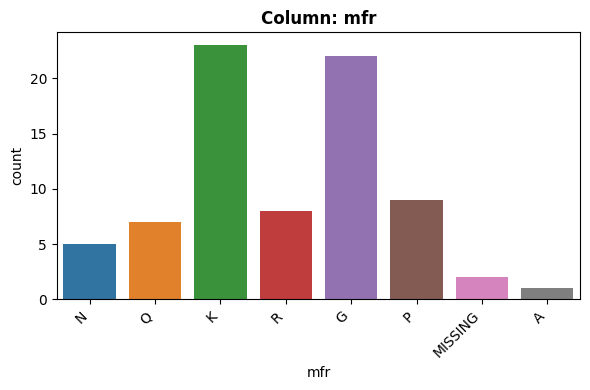

- NaN's Found: 2 (2.6%)
- Unique Values: 8
- Most common value: 'K' occurs 23 times (29.87%)
- Not constant or quasi-constant.


In [7]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2 null values (2.6%)
  - Impute with "MISSING" placeholder.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 8 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'mfr vs. rating'}, xlabel='mfr', ylabel='rating'>)

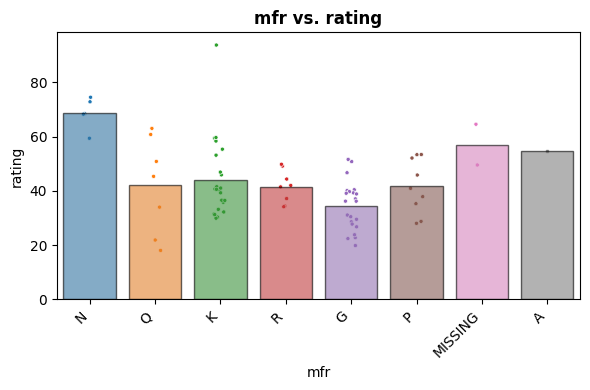

In [8]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'rating')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes it does, there is variability between the groups, even though some have similar means.

___

### type

- type: hot or cold
  

In [9]:
# Confirming the dtype to select correct EDA function
feature = "type"
df[feature].dtype

dtype('O')

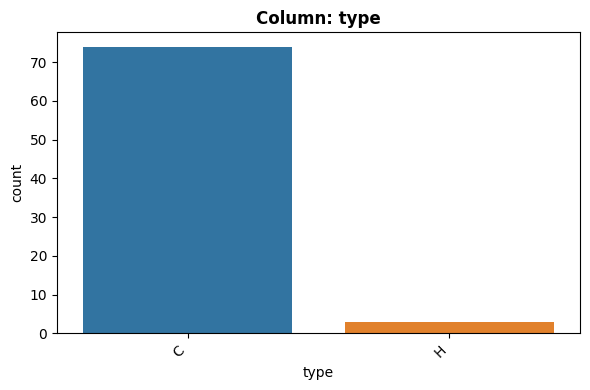

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'C' occurs 74 times (96.1%)
- Not constant or quasi-constant.


In [10]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 2 unique values (very low).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



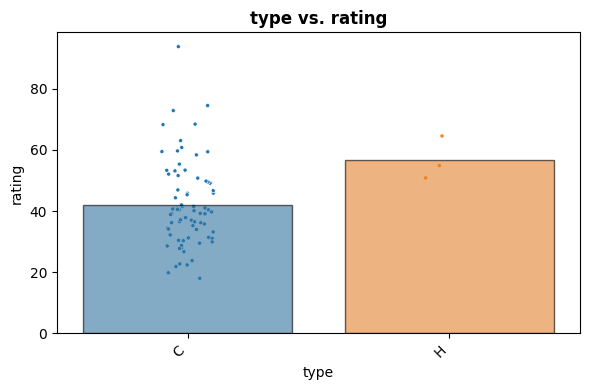

In [11]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think one might be rated higher. 
  - Does this feature appear to be a predictor of the target?
    - Yes, hot cereals seem to get a higher rating.

___

### calories

- calories: calories per serving

In [12]:
# Confirming the dtype to select correct EDA function
feature = "calories"
df[feature].dtype

dtype('float64')

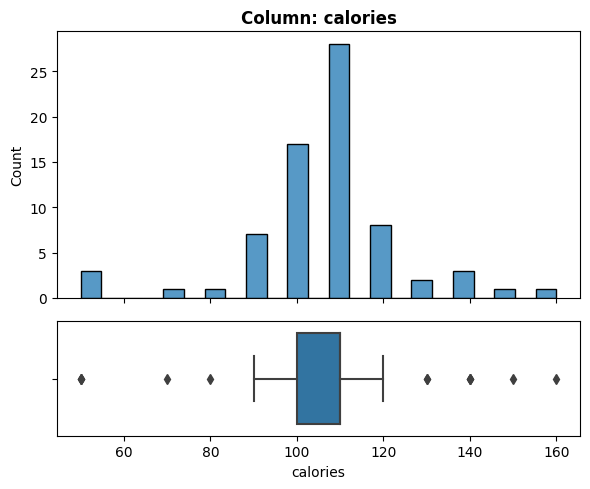

- NaN's Found: 5 (6.49%)
- Unique Values: 11
- Most common value: '110.0' occurs 28 times (36.36%)
- Not constant or quasi-constant.


In [13]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 5 (6.49%)
  - impute with median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



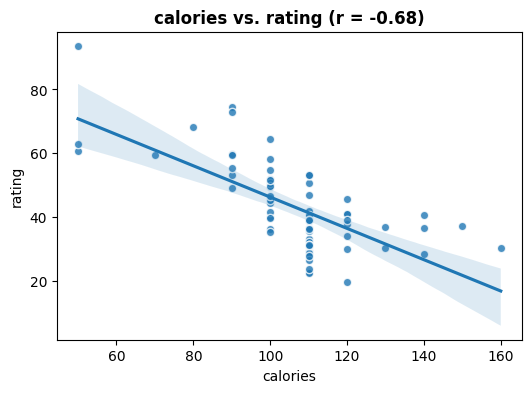

In [14]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think people may prefer high calorie cereals.
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite direction than I expected!

___

### protein

- protein: grams of protein
  

In [15]:
# Confirming the dtype to select correct EDA function
feature = "protein"
df[feature].dtype

dtype('int64')

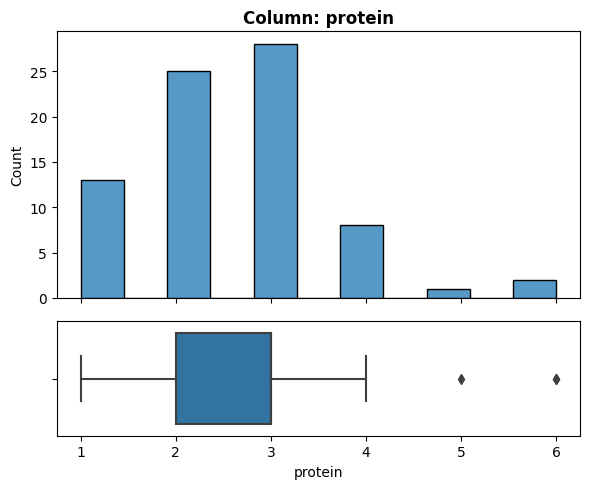

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: '3' occurs 28 times (36.36%)
- Not constant or quasi-constant.


In [16]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 6 unique values. Not high (since its \<10).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



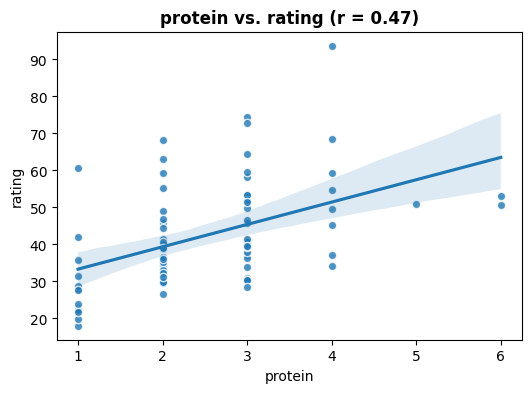

In [17]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I would assume more protein would be better.
  - Does this feature appear to be a predictor of the target?
    - Yes!

___

### fat

- fat: grams of fat
  

In [18]:
# Confirming the dtype to select correct EDA function
feature = "fat"
df[feature].dtype

dtype('float64')

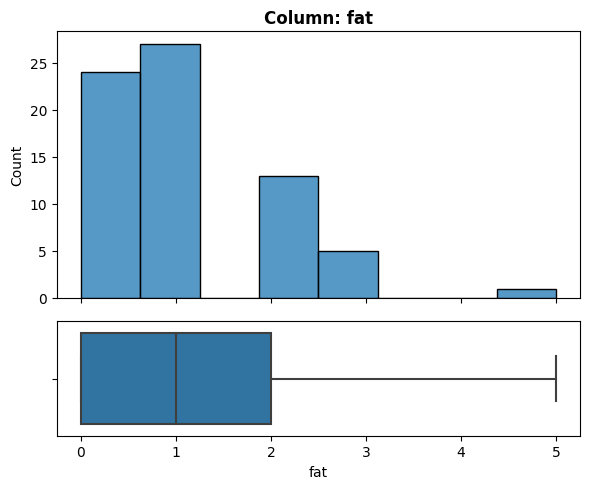

- NaN's Found: 7 (9.09%)
- Unique Values: 5
- Most common value: '1.0' occurs 27 times (35.06%)
- Not constant or quasi-constant.


In [19]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 7 (9%)
  - impute with median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



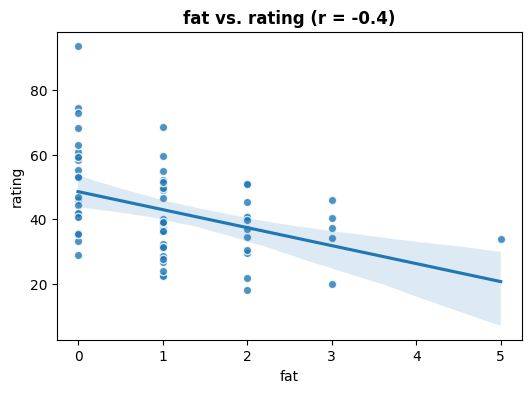

In [20]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I assume fatty cereals would be rated higher. 
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite direction than expected.

___

### fiber

- fiber: grams of dietary fiber

  

In [21]:
# # Confirming the dtype to select correct EDA function
feature = "fiber"
df[feature].dtype

dtype('float64')

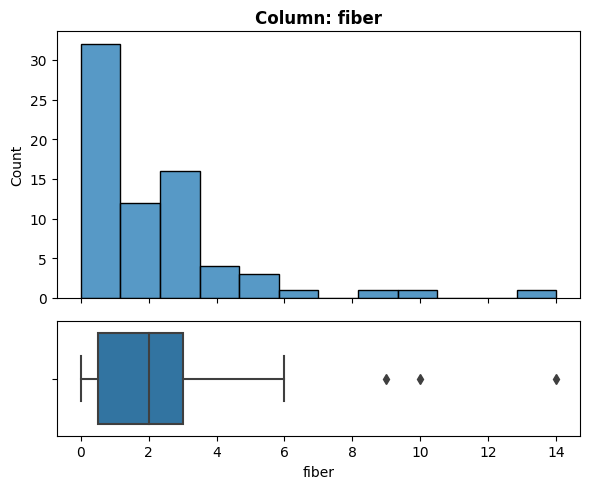

- NaN's Found: 6 (7.79%)
- Unique Values: 13
- Most common value: '0.0' occurs 18 times (23.38%)
- Not constant or quasi-constant.


In [22]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 6 (7.79%)
  - Impute with the median

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



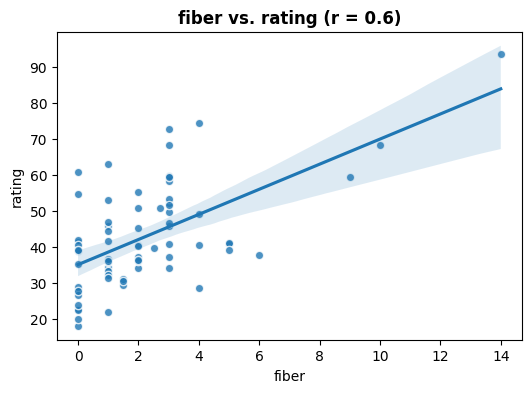

In [23]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes I would expect having more fiber corresponds with a higher rating.
  - Does this feature appear to be a predictor of the target?
    - Yes.

___

In [24]:
df.columns

Index(['mfr', 'type', 'calories', 'protein', 'fat', 'fiber', 'sugars', 'shelf',
       'rating'],
      dtype='object')

### sugars

- sugars: grams of sugars

In [25]:
# Confirming the dtype to select correct EDA function
feature = "sugars"
df[feature].dtype

dtype('float64')

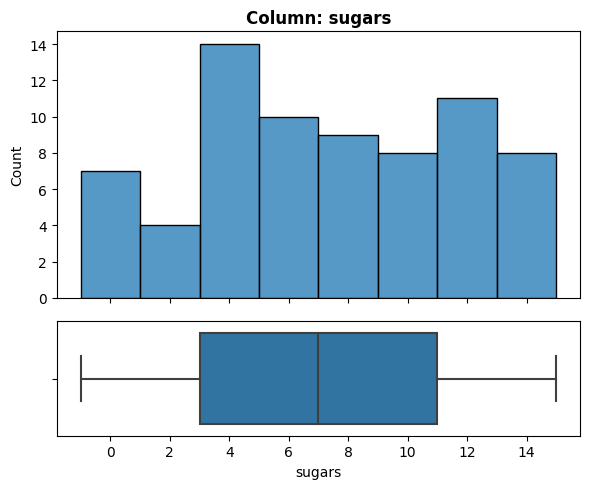

- NaN's Found: 6 (7.79%)
- Unique Values: 17
- Most common value: '3.0' occurs 13 times (16.88%)
- Not constant or quasi-constant.


In [26]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 6 (7.79%)
  - Impute with the median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable, numeric.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



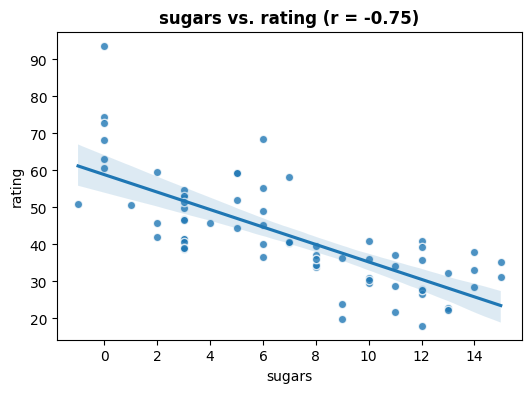

In [27]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think people would rate sugary cereals higher.
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite of what I expected.

___

### shelf

- shelf: display shelf (1, 2, or 3, counting from the floor)

In [28]:
# Confirming the dtype to select correct EDA function
feature = "shelf"
df[feature].dtype

dtype('O')

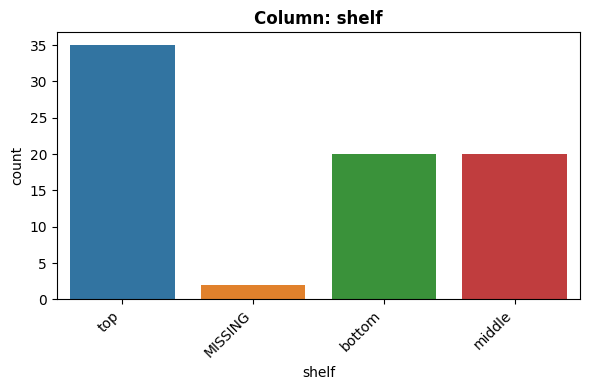

- NaN's Found: 2 (2.6%)
- Unique Values: 4
- Most common value: 'top' occurs 35 times (45.45%)
- Not constant or quasi-constant.


In [29]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal. Data Dictionary says it should be integers: 1,2,3 with 1 being closest to the floor)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2 (2.6%)
  - Impute with a placeholder (0)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 (including null values). 

5. Would we know this BEFORE the target is determined?
  - Maybe? 

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



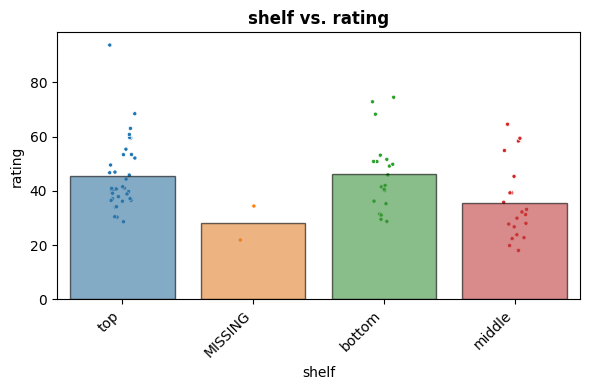

In [30]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - I am not sure. 
  - Does this feature appear to be a predictor of the target?
    - Yes, it seems that being in the middle shelf is associated with a lower rating.

___

### rating (target)

- rating: a rating of the cereals (Possibly from Consumer Reports?)

  

In [31]:
# Confirming the dtype to select correct EDA function
feature = "rating"
df[feature].dtype

dtype('float64')

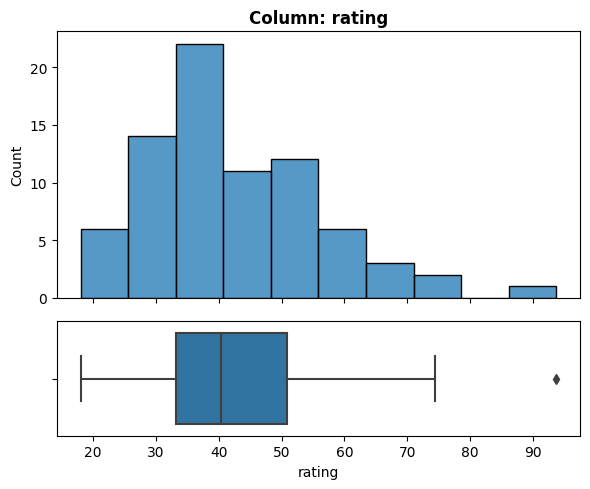

- NaN's Found: 0 (0.0%)
- Unique Values: 77
- Most common value: '68.402973' occurs 1 times (1.3%)
- Not constant or quasi-constant.


In [32]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric. our target!

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - Not a feature! 

4. What is the cardinality? Is it high?
  - N/A - numeric.

5. Would we know this BEFORE the target is determined?
  - Yes, since it IS our target!

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, its our target!

